In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import mplfinance as mpf
import numpy as np
import urllib
from urllib.request import urlopen
import json
import csv
from datetime import datetime
import time
import datetime as dt
import time
import pandas as pd
from matplotlib import style
from pandas.plotting import register_matplotlib_converters

In [12]:
style.use('ggplot')
register_matplotlib_converters()

In [39]:
def bytespdate2num(fmt):
    def converter(b):
        return mdates.strpdate2num(fmt)(b.decode('ascii'))
    return converter

def graph_data():

    # Unfortunately, Yahoo's API is no longer available
    # feel free to adapt the code to another source, or use this drop-in replacement.
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'

    source_code = urllib.request.urlopen(stock_price_url).read().decode()

    stock_data = []
    split_source = source_code.split('\n')

    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line:
                stock_data.append(line)
    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          # %Y = full year. 2015
                                                          # %y = partial year 15
                                                          # %m = number month
                                                          # %d = number day
                                                          # %H = hours
                                                          # %M = minutes
                                                          # %S = seconds
                                                          # 12-06-2014
                                                          # %m-%d-%Y
                                                          converters={0: bytespdate2num('%Y-%m-%d')})
    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1),(0,0))
    
    ax1.plot_date(date, closep, "-", label="Price")
    ax1.plot([],[], linewidth=5, label="loss", color='g', alpha=0.3)
    ax1.plot([],[], linewidth=5, label="gain", color='r', alpha=0.3)

    ax1.fill_between(date, closep, 136, where=(closep > 136), facecolor='g', alpha=0.3)
    
    ax1.fill_between(date, closep, 136, where=(closep < 136), facecolor='r', alpha=0.3)
    
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.grid(True, color="g", linestyle="-", linewidth=2)
    
    bbox_props = dict(boxstyle='larrow',fc='w', ec='k', lw=1)
    ax1.annotate(str(closep[-1]), (date[-1], closep[-1]), 
                xytext = (date[-1]+4, closep[-1]), bbox=bbox_props)
    
    
    
    
#     # Annotation example with arrow
#     ax1.annotate('Bad News!', (date[11],highp[11]),
#                 xytext=(0.8, 0.9), textcoords='axes fraction',
#                 arrowprops = dict(facecolor='grey',color='grey'))
    
#     # Font dict example
#     font_dict = {
#         'family':'serif',
#         'color':'orange',
#         "size":30
#     }
#     # Hard coded text
#     ax1.text(date[10],closep[1],'Yahoo Prices',fontdict=font_dict)
    
    
    ax1.xaxis.label.set_color('c')
    ax1.yaxis.label.set_color('r')
    
    ax1.set_yticks([x for x in range(0,1000,200)])
    
    plt.xlabel("year")
    plt.ylabel("price")
    plt.title("Financial Data")
    
    plt.legend()
    plt.subplots_adjust(left=0.11, bottom=0.24, top=0.95, right=0.99, wspace=0.2, hspace=0)

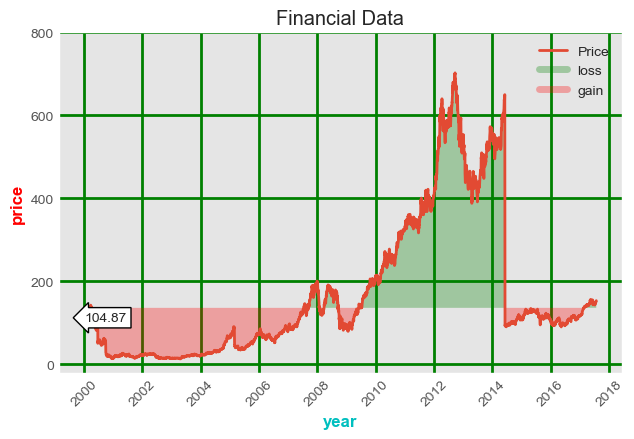

In [40]:
graph_data()